In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the CSV file
file_path = 'y_obs.csv'
data = pd.read_csv(file_path, parse_dates=[0])

# Set the unnamed first column (dates) as the index
data.set_index(data.columns[0],inplace=True)

In [3]:
data

,GRDC_6140100,GRDC_6140101,GRDC_6140120,GRDC_6140130,GRDC_6140140,GRDC_6140150,GRDC_6140250,GRDC_6140280,GRDC_6140300,GRDC_6140400,...,GRDC_6943170,GRDC_6943180,GRDC_6948100,GRDC_6948110,GRDC_6948111,GRDC_6948120,GRDC_6948150,GRDC_6948360,GRDC_6948520,GRDC_6948530
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2011-01-01,0.96,0.94,0.50,2.66,2.63,0.94,0.94,1.04,0.91,0.76,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00
2011-01-02,0.64,0.68,1.77,2.97,3.30,1.03,0.53,0.50,1.05,1.10,...,0.14,0.32,0.11,0.05,0.07,0.05,0.00,0.08,0.00,0.03
2011-01-03,0.63,0.72,1.18,1.90,2.20,0.65,0.56,0.45,0.75,0.84,...,0.02,0.03,0.03,0.02,0.02,0.14,0.02,0.06,0.02,0.13
2011-01-04,0.20,0.24,0.09,0.26,0.21,0.02,0.08,0.14,0.04,0.10,...,0.00,0.00,0.40,0.01,0.01,0.76,0.29,0.56,0.34,0.25
2011-01-05,0.29,0.30,0.06,0.39,0.28,0.01,0.06,0.10,0.02,0.13,...,0.01,0.00,0.28,0.01,0.01,0.39,0.20,0.27,0.22,0.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,0.03,0.03,0.02,0.02,0.01,0.00,0.00,0.00,0.00,0.01,...,0.27,0.12,0.69,0.26,0.25,1.04,0.43,1.36,0.46,1.87
2020-12-28,1.42,1.37,0.96,2.53,2.07,2.61,2.33,2.82,2.46,1.78,...,17.19,13.94,13.08,21.14,20.06,10.51,17.35,9.03,17.53,7.37
2020-12-29,1.98,2.07,0.38,1.83,1.24,0.16,0.51,0.83,0.22,0.65,...,0.81,0.32,1.21,0.67,0.71,1.21,0.44,1.74,0.42,1.10


In [4]:
# Function to calculate precipitation indices for a single catchment
def calculate_precipitation_indices(series):
    indices = {}

    # Total precipitation amount
    indices['prcptot'] = series.sum()

    # Number of days with daily precipitation amount above 1mm
    indices['RR1'] = (series > 1).sum()

    # Maximum 1-day precipitation amount
    indices['rx1day'] = series.max()

    # Maximum 5-days precipitation amount
    indices['rx5day'] = series.rolling(window=5).sum().max()

    # Number of consecutive wet days (daily precipitation ≥ 1 mm)
    def max_consecutive_wet_days(s):
        wet_days = (s >= 1).astype(int)
        return wet_days.groupby((wet_days != wet_days.shift()).cumsum()).cumsum().max()

    indices['cwd'] = max_consecutive_wet_days(series)

    # Number of days with daily precipitation amount above 20 mm
    indices['rr20mm'] = (series >= 20).sum()

    # Daily precipitation amount corresponding to the 90th percentile
    indices['r90p'] = series[series >= 1].quantile(0.9)

    # Daily precipitation amount corresponding to the 95th percentile
    indices['r95p'] = series[series >= 1].quantile(0.95)

    # Daily precipitation amount corresponding to the 99th percentile
    indices['r99p'] = series[series >= 1].quantile(0.99)

    # Frequency of rainy days exceeding the 90th percentile
    r90p_value = series[series >= 1].quantile(0.9)
    indices['r90pday'] = (series >= r90p_value).sum()

    # Frequency of rainy days exceeding the 95th percentile
    r95p_value = series[series >= 1].quantile(0.95)
    indices['r95pday'] = (series >= r95p_value).sum()

    # Frequency of rainy days exceeding the 99th percentile
    r99p_value = series[series >= 1].quantile(0.99)
    indices['r99pday'] = (series >= r99p_value).sum()

    # Magnitude of precipitation amount standardised over 95th percentile
    indices['nrr95p'] = (series / series.quantile(0.95)).mean()

    # Magnitude of precipitation amount standardised over 99th percentile
    indices['nrr99p'] = (series / series.quantile(0.99)).mean()

    # Dry Day Indices

    # Number of dry days (precipitation < 1 mm)
    indices['dry_days'] = (series < 1).sum()

    # Number of consecutive dry days (precipitation < 1 mm)
    def max_consecutive_dry_days(s):
        dry_days = (s < 1).astype(int)
        return dry_days.groupby((dry_days != dry_days.shift()).cumsum()).cumsum().max()

    indices['cdd'] = max_consecutive_dry_days(series)

    return pd.Series(indices)

# Function to calculate indices for each year and catchment
def calculate_yearly_indices(data):
    yearly_indices_list = []

    for year, group in data.groupby(data.index.year):
        for column in group.columns:
            catchment_data = group[column]
            indices = calculate_precipitation_indices(catchment_data)
            indices['Year'] = year
            indices['Catchment'] = column
            yearly_indices_list.append(indices)

    return pd.DataFrame(yearly_indices_list)



In [5]:
# Calculate indices for each year and each catchment
yearly_indices = calculate_yearly_indices(data)

# Calculate the average indices over all years for each catchment
average_indices = yearly_indices.groupby('Catchment').mean()

print(average_indices)

               prcptot    RR1  rx1day   rx5day   cwd  rr20mm     r90p  \
Catchment                                                               
GRDC_6140100   848.795  156.1  31.444   59.862  11.6     3.2  11.2090   
GRDC_6140101   812.151  151.2  30.650   58.252  10.3     2.8  10.6964   
GRDC_6140120   795.856  143.6  34.191   61.990   9.1     2.8  11.1036   
GRDC_6140130  1096.821  176.9  36.781   73.780  13.8     5.4  12.3787   
GRDC_6140140  1058.644  172.2  39.332   75.967  13.0     5.5  12.3502   
...                ...    ...     ...      ...   ...     ...      ...   
GRDC_6948120  1889.707  197.5  83.682  198.230  13.7    22.7  21.3734   
GRDC_6948150  1693.033  159.8  75.704  162.933  13.3    22.5  25.1882   
GRDC_6948360  1921.644  206.0  79.777  187.091  14.4    21.4  20.0204   
GRDC_6948520  1481.799  162.7  65.981  134.572  13.6    18.6  22.1542   
GRDC_6948530  1683.332  204.7  64.798  144.331  17.2    17.4  17.8806   

                  r95p      r99p  r90pday  r95pday

In [6]:
average_indices.to_csv('indices_obs.csv')

In [7]:
# Load the CSV file
file_path = 'y_sim.csv'
data_sim = pd.read_csv(file_path, parse_dates=[0])

# Set the unnamed first column (dates) as the index
data_sim.set_index(data_sim.columns[0],inplace=True)

In [8]:
# Calculate indices for each year and each catchment
yearly_indices2 = calculate_yearly_indices(data_sim)

# Calculate the average indices over all years for each catchment
average_indices2 = yearly_indices2.groupby('Catchment').mean()

print(average_indices2)

                  prcptot    RR1     rx1day      rx5day   cwd  rr20mm  \
Catchment                                                               
GRDC_6140100   835.904164  248.4  22.861333   48.969586  27.1     1.1   
GRDC_6140101   812.921515  242.7  21.558205   46.521247  29.7     1.0   
GRDC_6140120   817.375894  230.4  26.893547   51.663235  25.1     1.6   
GRDC_6140130  1117.961326  281.3  27.655065   60.057141  48.4     2.9   
GRDC_6140140  1095.038915  273.3  33.178839   65.959094  41.1     3.0   
...                   ...    ...        ...         ...   ...     ...   
GRDC_6948120  1640.619628  275.5  59.557448  156.569692  58.1    14.0   
GRDC_6948150  1388.923592  229.9  48.133571  115.783483  29.4    12.5   
GRDC_6948360  1705.105873  278.7  59.257015  155.146416  64.1    12.9   
GRDC_6948520  1366.816454  238.5  48.382882  113.351184  38.4    12.4   
GRDC_6948530  1365.664215  273.6  40.528326   84.385439  64.5     5.5   

                   r90p       r95p       r99p  r90

In [9]:
average_indices2.to_csv('indices_sim.csv')

In [21]:
# Load the second CSV file containing basin_id, lat, and lon
df2 = pd.read_csv(r"C:\Users\as2023\bwSyncShare\01_Analysis\03_Backward_Hydrology\01_Analysis\01_baseline\grdc_caravan.csv", usecols=['gauge_id', 'gauge_lat', 'gauge_lon'])

# Rename 'gauge_id' 
df2.rename(columns={'gauge_id': 'Catchment'}, inplace=True)

In [22]:
df2

,Catchment,gauge_lat,gauge_lon
0,GRDC_1159100,-28.7563,17.7188
1,GRDC_1159103,-28.9604,19.1521
2,GRDC_1159105,-28.0771,16.8979
3,GRDC_1159110,-31.8030,20.3560
4,GRDC_1159120,-31.8220,20.5780
...,...,...,...
5352,GRDC_6948120,46.1688,8.7729
5353,GRDC_6948150,46.0187,8.9604
5354,GRDC_6948360,46.3688,8.5396
5355,GRDC_6948520,46.2021,9.1688


In [12]:
# Read the CSV files containing average indices for simulated and observed data
simulated_indices = pd.read_csv('indices_sim.csv', index_col=0)
observed_indices = pd.read_csv('indices_obs.csv', index_col=0)

# Add suffixes to columns to distinguish between simulated and observed data
simulated_indices.columns = [col + '_sim' for col in simulated_indices.columns]
observed_indices.columns = [col + '_obs' for col in observed_indices.columns]

# Merge the two DataFrames on the index
merged_indices = pd.merge(simulated_indices, observed_indices, left_index=True, right_index=True)


# Save the merged DataFrame to a new CSV file
merged_indices.to_csv('merged_indices.csv')

print("Merged indices saved successfully.")

Merged indices saved successfully.


In [24]:
# Merge the two dataframes based on the 'basin_id' column
merged_df = pd.merge(merged_indices, df2, on='Catchment', how='inner')

In [25]:
merged_df

,Catchment,prcptot_sim,RR1_sim,rx1day_sim,rx5day_sim,cwd_sim,rr20mm_sim,r90p_sim,r95p_sim,r99p_sim,...,r90pday_obs,r95pday_obs,r99pday_obs,nrr95p_obs,nrr99p_obs,dry_days_obs,cdd_obs,Year_obs,gauge_lat,gauge_lon
0,GRDC_6140100,835.904164,248.4,22.861333,48.969586,27.1,1.1,5.977063,8.504099,14.861447,...,16.1,8.3,2.0,0.227426,0.122012,208.6,19.6,2015.5,50.5312,16.1896
1,GRDC_6140101,812.921515,242.7,21.558205,46.521247,29.7,1.0,5.785915,8.452360,15.441699,...,15.7,8.0,2.0,0.229427,0.120622,213.4,19.3,2015.5,50.4813,16.1812
2,GRDC_6140120,817.375894,230.4,26.893547,51.663235,25.1,1.6,6.476864,9.859586,15.841102,...,15.0,7.8,2.0,0.220369,0.122190,221.1,18.8,2015.5,49.8896,15.4812
3,GRDC_6140130,1117.961326,281.3,27.655065,60.057141,48.4,2.9,7.664358,10.664467,18.716632,...,18.1,9.3,2.0,0.245271,0.136770,187.8,17.3,2015.5,50.6396,15.5188
4,GRDC_6140140,1095.038915,273.3,33.178839,65.959094,41.1,3.0,7.590117,10.742423,19.423398,...,17.7,9.3,2.0,0.243944,0.138157,192.8,17.6,2015.5,50.6562,15.3271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,GRDC_6948120,1640.619628,275.5,59.557448,156.569692,58.1,14.0,11.925973,19.433106,41.546972,...,20.4,10.5,2.5,0.235875,0.095792,167.2,16.4,2015.5,46.1688,8.7729
1392,GRDC_6948150,1388.923592,229.9,48.133571,115.783483,29.4,12.5,13.871361,21.051963,34.896919,...,16.6,8.5,2.0,0.204139,0.099400,205.2,21.4,2015.5,46.0187,8.9604
1393,GRDC_6948360,1705.105873,278.7,59.257015,155.146416,64.1,12.9,11.962685,18.809182,43.203910,...,21.1,10.8,2.7,0.242531,0.106597,159.1,15.7,2015.5,46.3688,8.5396
1394,GRDC_6948520,1366.816454,238.5,48.382882,113.351184,38.4,12.4,12.851530,19.726016,36.909454,...,16.8,8.5,2.0,0.206610,0.101554,202.3,19.8,2015.5,46.2021,9.1688


In [26]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def plot_world_map(df, index_column, extent):
    df_cleaned = df.dropna(subset=['gauge_lat', 'gauge_lon', index_column])
    fig = plt.figure(figsize=(9, 6))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

    ax.set_extent(extent)

    ax.add_feature(cfeature.LAND, color='lightgray')
    ax.add_feature(cfeature.OCEAN, color='white')
    ax.add_feature(cfeature.COASTLINE)
    
    # Get the minimum and maximum values of the index column for custom colormap limits
    vmin = df_cleaned[index_column].min()
    vmax = df_cleaned[index_column].max()

    # Plot the latitude and longitude points with the specified index values
    sc = ax.scatter(df_cleaned['gauge_lon'], df_cleaned['gauge_lat'], c=df_cleaned[index_column], cmap='viridis', 
                    marker='o', transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax, s=10, edgecolors='white', linewidths=0.2)

    # Add colorbar
    cbar = plt.colorbar(sc, ax=ax,  shrink=0.6, extend='both')
    cbar.set_label(index_column)

    ax.coastlines()

    plt.show()

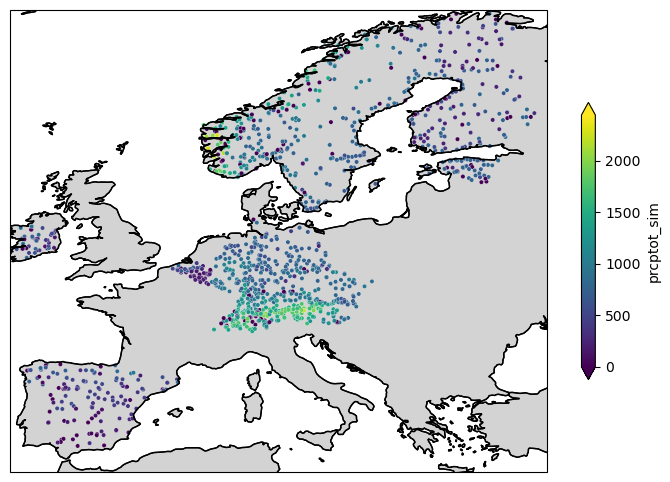

In [34]:
# Manually set the latitude and longitude extent

# Specify the index column to plot
index_column = 'prcptot_sim'  # Replace 'NSE' with the name of your index column

# Plot the world map
plot_world_map(merged_df, index_column, europe_extent)

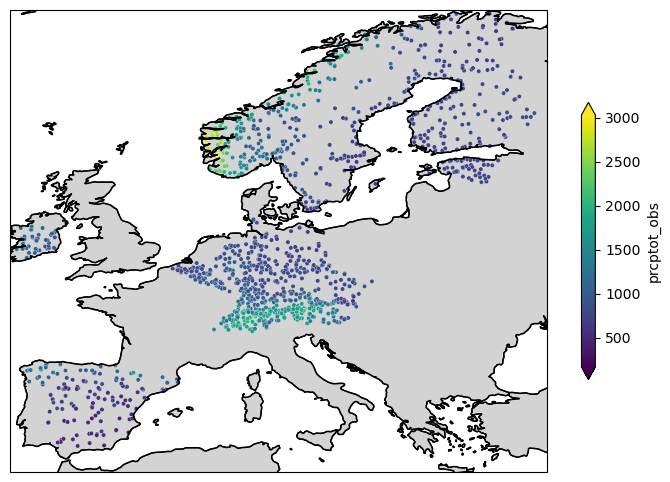

In [33]:
# Manually set the latitude and longitude extent
europe_extent = [-10, 32, 35, 70]

# Specify the index column to plot
index_column = 'prcptot_obs'  # Replace 'NSE' with the name of your index column

# Plot the world map
plot_world_map(merged_df, index_column, europe_extent)

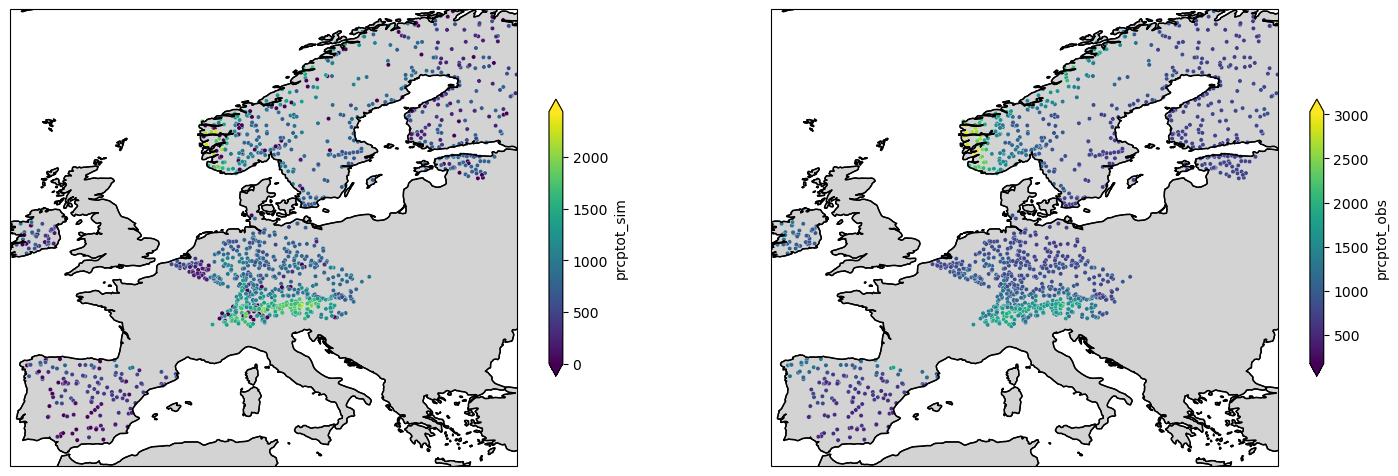

In [44]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def plot_comparison_maps(simulated_df, observed_df, index_column, extent):
    # Clean the simulated and observed DataFrames by dropping NaN values in relevant columns
    simulated_df_cleaned = simulated_df.dropna(subset=['gauge_lat', 'gauge_lon', index_column + '_sim'])
    observed_df_cleaned = observed_df.dropna(subset=['gauge_lat', 'gauge_lon', index_column + '_obs'])
    
    fig, axes = plt.subplots(1, 2, figsize=(18, 6), subplot_kw={'projection': ccrs.PlateCarree()})

    for ax, df, suffix in zip(axes, [simulated_df_cleaned, observed_df_cleaned], ['_sim', '_obs']):
        ax.set_extent(extent)

        ax.add_feature(cfeature.LAND, color='lightgray')
        ax.add_feature(cfeature.OCEAN, color='white')
        ax.add_feature(cfeature.COASTLINE)

        index_col = index_column + suffix
        vmin = df[index_col].min()
        vmax = df[index_col].max()

        sc = ax.scatter(df['gauge_lon'], df['gauge_lat'], c=df[index_col], cmap='viridis', 
                        marker='o', transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax, s=10, edgecolors='white', linewidths=0.2)

        cbar = plt.colorbar(sc, ax=ax, shrink=0.6, extend='both')
        cbar.set_label(index_column + suffix)

        ax.coastlines()

    plt.show()

# Manually set the latitude and longitude extent for Europe
europe_extent = [-10, 30, 35, 70]

# Specify the index column to plot
index_column = 'prcptot'  # Replace 'NSE' with the name of your index column

# Plot the comparison maps for simulated and observed indices
plot_comparison_maps(simulated_df=merged_df, observed_df=merged_df, index_column=index_column, extent=europe_extent)


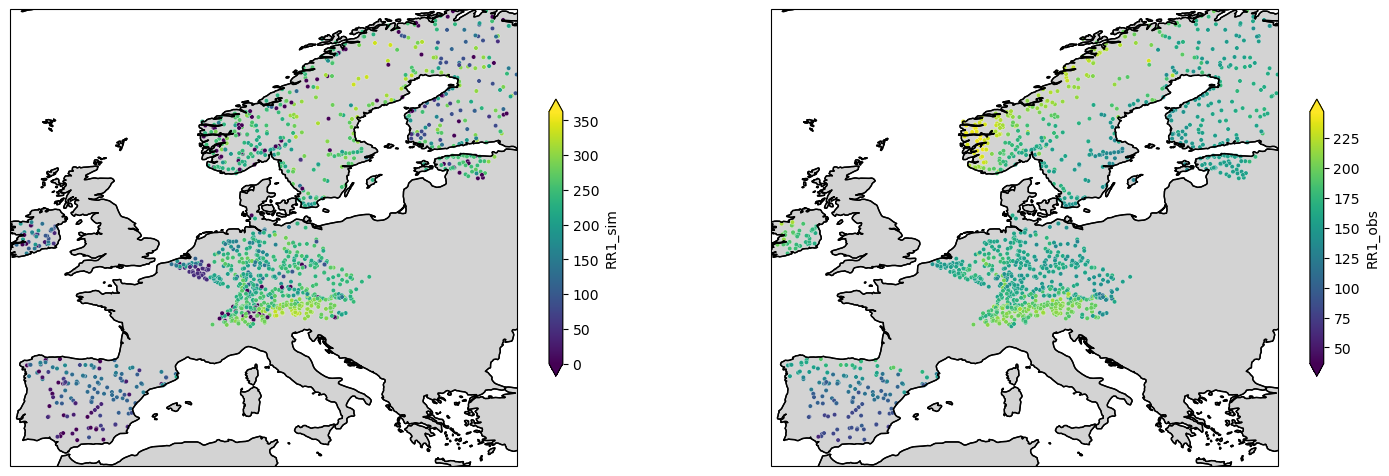

In [47]:
# Specify the index column to plot
index_column = 'RR1'  # Replace 'NSE' with the name of your index column

# Plot the comparison maps for simulated and observed indices
plot_comparison_maps(simulated_df=merged_df, observed_df=merged_df, index_column=index_column, extent=europe_extent)

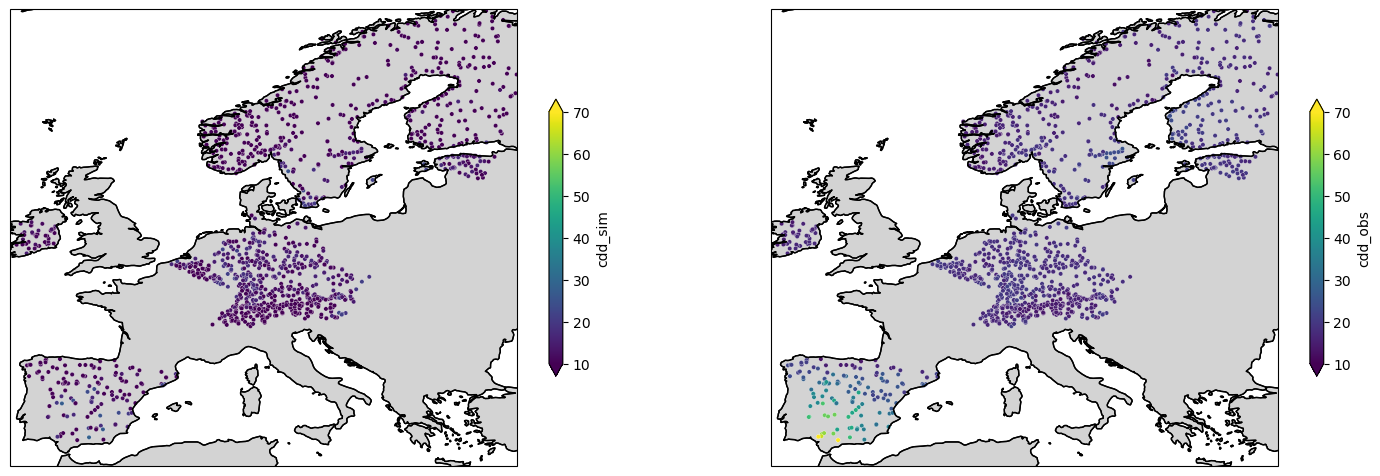

In [42]:
# Specify the index column to plot
index_column = 'cdd'  # Replace 'NSE' with the name of your index column
def plot_comparison_maps(simulated_df, observed_df, index_column, extent):
    # Clean the simulated and observed DataFrames by dropping NaN values in relevant columns
    simulated_df_cleaned = simulated_df.dropna(subset=['gauge_lat', 'gauge_lon', index_column + '_sim'])
    observed_df_cleaned = observed_df.dropna(subset=['gauge_lat', 'gauge_lon', index_column + '_obs'])
    
    fig, axes = plt.subplots(1, 2, figsize=(18, 6), subplot_kw={'projection': ccrs.PlateCarree()})

    for ax, df, suffix in zip(axes, [simulated_df_cleaned, observed_df_cleaned], ['_sim', '_obs']):
        ax.set_extent(extent)

        ax.add_feature(cfeature.LAND, color='lightgray')
        ax.add_feature(cfeature.OCEAN, color='white')
        ax.add_feature(cfeature.COASTLINE)

        index_col = index_column + suffix
        vmin = 10
        vmax = 70

        sc = ax.scatter(df['gauge_lon'], df['gauge_lat'], c=df[index_col], cmap='viridis', 
                        marker='o', transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax, s=10, edgecolors='white', linewidths=0.2)

        cbar = plt.colorbar(sc, ax=ax, shrink=0.6, extend='both')
        cbar.set_label(index_column + suffix)

        ax.coastlines()

    plt.show()
# Plot the comparison maps for simulated and observed indices
plot_comparison_maps(simulated_df=merged_df, observed_df=merged_df, index_column=index_column, extent=europe_extent)